### In our mobile application, after onboarding, the user is offered to buy a weekly subscription worth $4.99, which gives access to premium features. Every day, the application installs 2000 users, 34% reach the subscription screen, 17% of them buy a subscription (conversion 5.78%)

### We decided to test an alternative subscription screen design where we also offer a subscription for $4.99, but indicate that this is a 50% discount.

### We expect to see at least a 10% increase in conversions with this change.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
# parameters
pd.set_option("display.max_columns", 500) # number columns
pd.set_option("display.max_rows", 1000) # number rows
pd.set_option("display.max_colwidth", 300) # column width
pd.set_option("display.precision", 7) # count symbols in float number

# disable additional warnings
import warnings
warnings.filterwarnings("ignore") 

# printing all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

df=pd.read_csv('ab_test_data.csv')

In [5]:
#Count the number of users in each of the groups
count_user_a = df[(df['test_group'] =='a')]['user_id'].count()
count_user_b = df[(df['test_group'] =='b')]['user_id'].count()
#Count conversion in each of the group
df_count_conversion_a = df[(df['conversion']==1) & (df['test_group'] =='a')]['conversion'].count()
df_count_conversion_b = df[(df['conversion']==1) & (df['test_group'] =='b')]['conversion'].count()
#Count conversion in persent in each of the group
conversion_a = round((df_count_conversion_a/count_user_a*100),2)
conversion_b = round((df_count_conversion_b/count_user_b*100),2)
#Calculate the start and end date of the test, as well as the duration of the test in days.
df['timestamp'] = pd.to_datetime(df['timestamp'])
start_date = df['timestamp'].min().date()
end_date = df['timestamp'].max().date()
test_duration= (end_date-start_date).days

#### All new users who received an offer to buy a weekly subscription for $4.99 were tested. They were randomly divided into two groups.

#### Group A: We offer these users to buy a subscription for $4.99 to access the premium features of the app
#### Group B: we offer the same subscription, but with a note that this is a 50% discount offer

In [6]:
print(f"""\033[1mTotal participants in Group A: {count_user_a} Group B: {count_user_b} 
Among them, purchased subscription in Group A: {df_count_conversion_a} in Group B: {df_count_conversion_b}
Conversion rate in percentages is A: {conversion_a}% B: {conversion_b}%
Test started on {start_date} ended on {end_date} total test duration was {test_duration} days\033[0m""")


Total participants in Group A: 10013 Group B: 9985 
Among them, purchased subscription in Group A: 611 in Group B: 889
Conversion rate in percentages is A: 6.1% B: 8.9%
Test started on 2023-07-03 ended on 2023-07-25 total test duration was 22 days


In [7]:
from scipy import stats
alpha = 0.05
statistic, pvalue = stats.ttest_ind(df[df['test_group']=='a']['conversion'], 
                                    df[df['test_group']== 'b']['conversion'],
                                    alternative = 'less')
print(f'\033[1mt-statistic:{round(statistic,2)} p-value:{round(pvalue,2)}')
if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.\033[0m')

t-statistic:-7.53 p-value:0.0
The difference is statistically significant, Null Hypothesis is rejected.


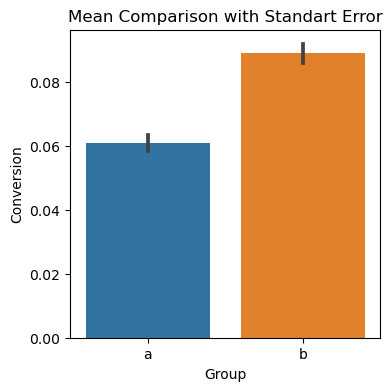

In [8]:
plt.figure(figsize=(4,4))

sns.barplot(x=df['test_group'],
            y=df['conversion'],
           errorbar=('se'))
plt.title('Mean Comparison with Standart Error')
plt.xlabel('Group')
plt.ylabel('Conversion')

plt.show()

#### After evaluating our testing using Student's criterion, we concluded that with a probability of 95% the new screen improves the conversion of premium subscription buyers. Therefore, it is recommended to scale the new screen to all users.

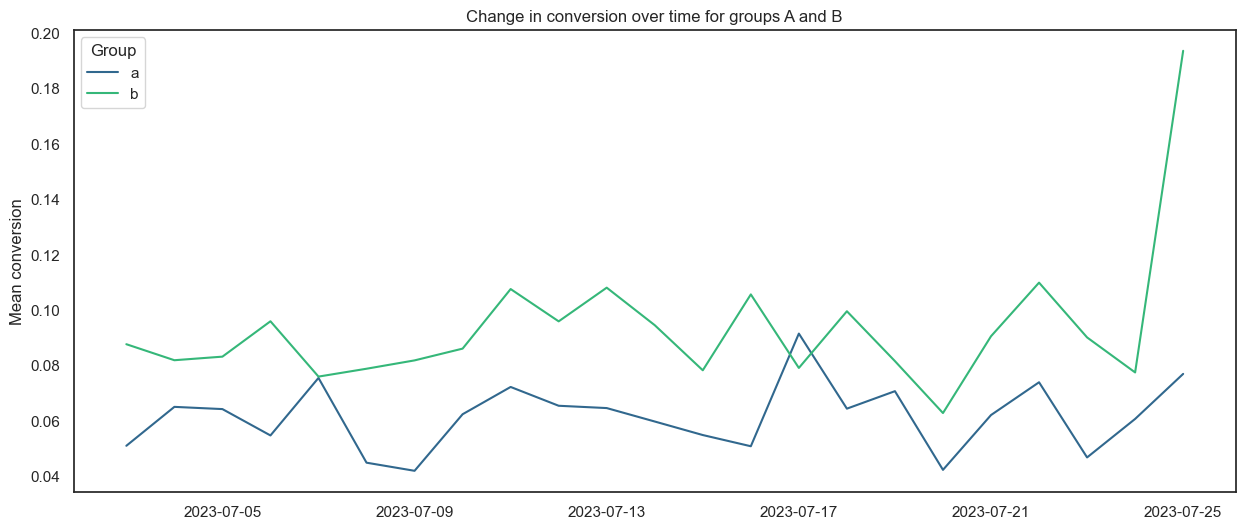

In [11]:
daily_conversion = df.groupby(['test_group', df['timestamp'].dt.date])['conversion'].mean().reset_index()

sns.set(style="white")
plt.figure(figsize=(15, 6))

sns.lineplot(x='timestamp', y='conversion', hue='test_group', data=daily_conversion, ci=None, palette="viridis")

plt.title('Change in conversion over time for groups A and B')
plt.xlabel('')
plt.ylabel('Mean conversion')
plt.legend(title='Group')

plt.show()